In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from PythonTsa.datadir import getdtapath
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

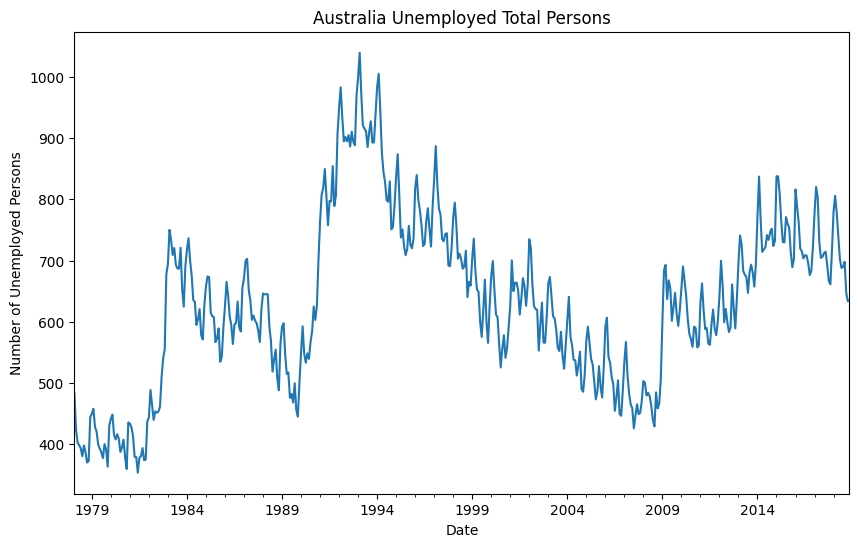

In [7]:
# Loading the dataset
dtapath = getdtapath()
x = pd.read_excel(dtapath + 'AustraliaUnemployedTotalPersons.xlsx', header=0)

# Setting the date index
timeindex = pd.date_range(start='1978-02', periods=len(x), freq='MS')
x.index = timeindex

# Removing unnecessary column
x = x.drop(columns='Time')

# Plotting the time series data
x.plot(figsize=(10, 6))
plt.title('Australia Unemployed Total Persons')
plt.xlabel('Date')
plt.legend().remove()
plt.ylabel('Number of Unemployed Persons')
plt.savefig("australia_number_of_unemployed_persons", transparent=True, dpi=600)
plt.show()

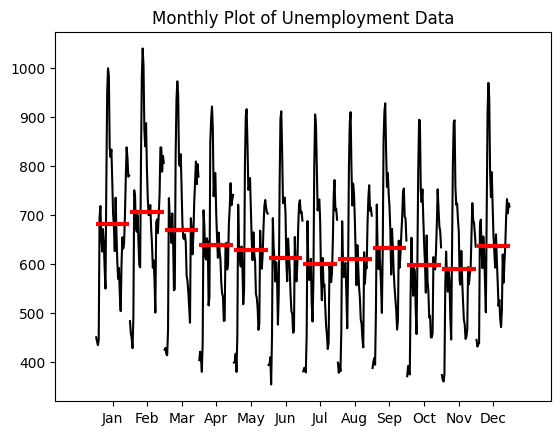

In [14]:
# Month plot for seasonality check
month_plot(x)
plt.title('Monthly Plot of Unemployment Data')
plt.savefig("australia_number_of_unemployed_persons_seasonal", transparent=True, dpi=600)
plt.show()

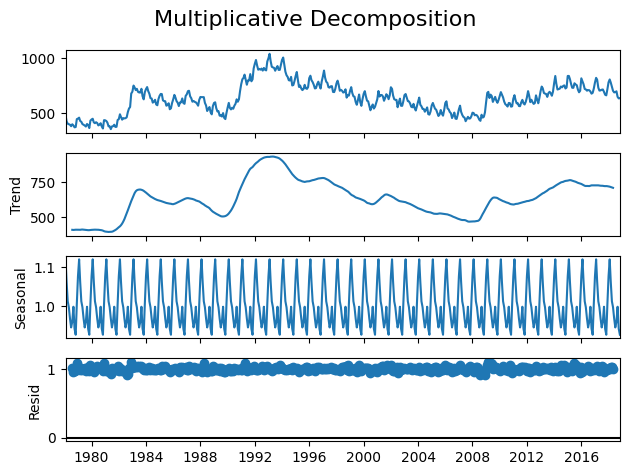

In [13]:
# Seasonal decomposition (Multiplicative and Additive)
xdecm_mul = seasonal_decompose(x, model='multiplicative')
xdecm_mul.plot()
plt.suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout()
plt.savefig("australia_unemployed_multiplicative", transparent=True, dpi=600)
plt.show()

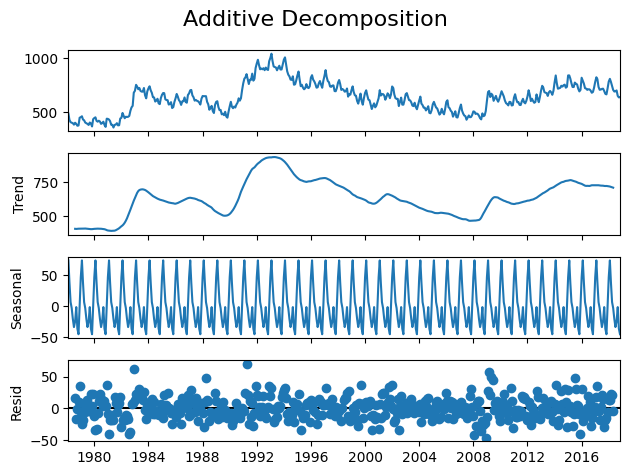

In [24]:
xdecm_add = seasonal_decompose(x, model='additive')
xdecm_add.plot()
plt.suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout()
plt.savefig("australia_unemployed_additive", transparent=True, dpi=600)
plt.show()

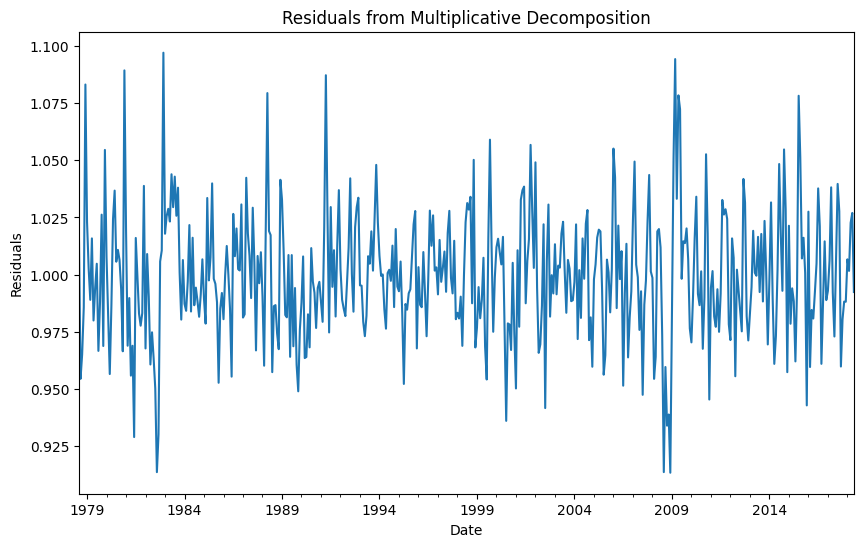

In [22]:
# Residuals from multiplicative decomposition
xdecmResid = xdecm_mul.resid.dropna()
xdecmResid.plot(figsize=(10, 6))
plt.title('Residuals from Multiplicative Decomposition')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.savefig("australia_unemployed_multiplicative_residuals", transparent=True, dpi=600)
plt.show()

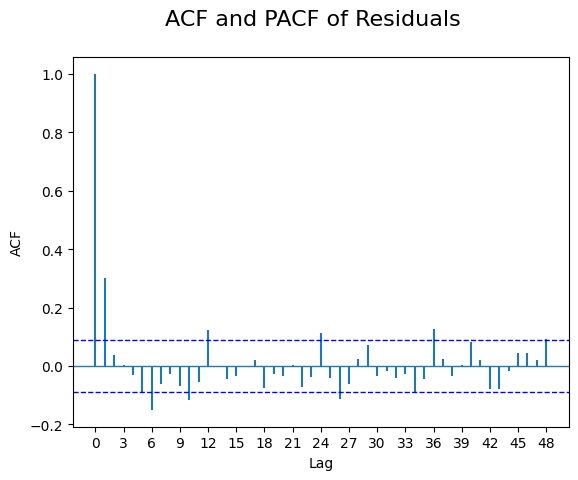

In [23]:
# ACF and PACF of Residuals
acf_pacf_fig(xdecmResid, both=False, lag=48)
plt.suptitle('ACF and PACF of Residuals', fontsize=16)
plt.savefig("australia_unemployed_multiplicative_residuals_acf", transparent=True, dpi=600)
plt.show()

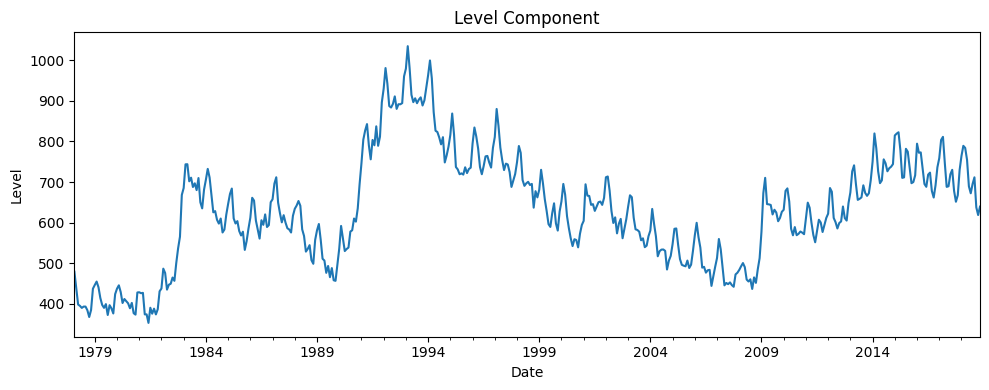

In [29]:
# Holt-Winters Exponential Smoothing
xhwfit = ExponentialSmoothing(x, trend='add', seasonal='add', seasonal_periods=4).fit()

plt.figure(figsize=(10, 4))
xhwfit.level.plot()
plt.ylabel('Level')
plt.title('Level Component')
plt.xlabel('Date')
plt.tight_layout()
plt.savefig("australia_unemployed_holtwinters_level", transparent=True, dpi=600)
plt.show()

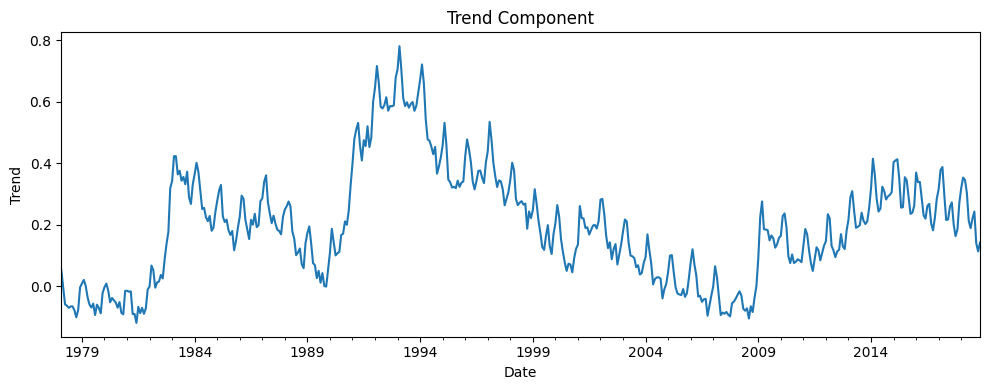

In [30]:
plt.figure(figsize=(10, 4))
xhwfit.trend.plot()
plt.ylabel('Trend')
plt.title('Trend Component')
plt.xlabel('Date')
plt.tight_layout()
plt.savefig("australia_unemployed_holtwinters_seasonal", transparent=True, dpi=600)
plt.show()

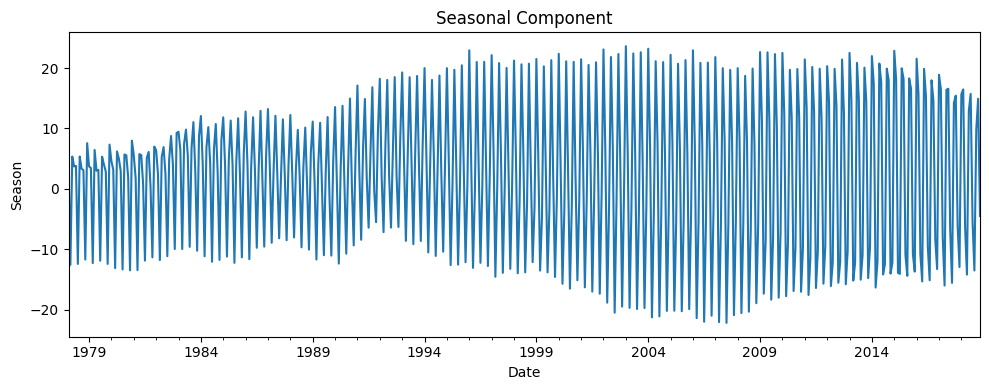

In [32]:
plt.figure(figsize=(10, 4))
xhwfit.season.plot()
plt.ylabel('Season')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.tight_layout()
plt.savefig("australia_unemployed_holtwinters_seasonal", transparent=True, dpi=600)
plt.show()

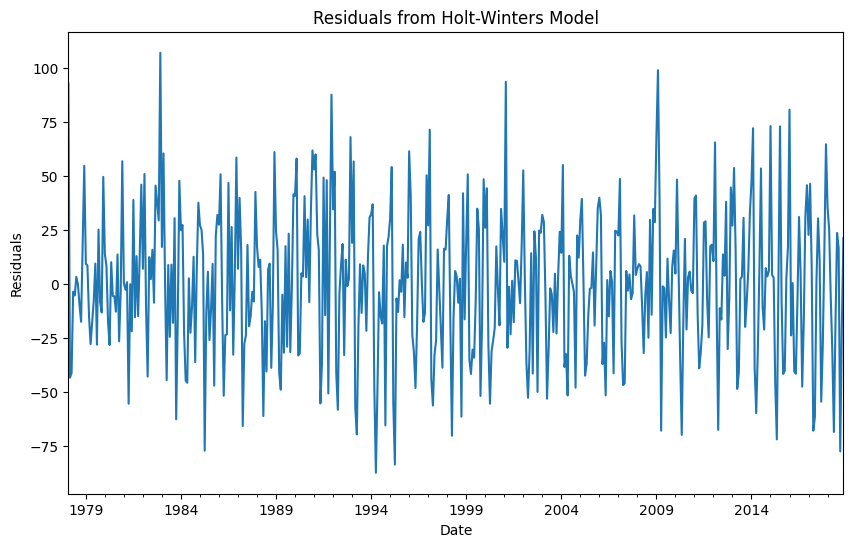

In [33]:
# Plotting Residuals from Holt-Winters model
xhwfit.resid.plot(figsize=(10, 6))
plt.title('Residuals from Holt-Winters Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.savefig("australia_unemployed_holtwinters_residuals", transparent=True, dpi=600)
plt.show()

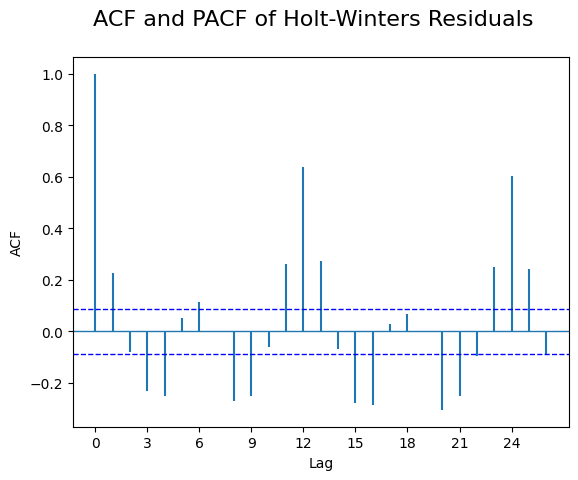

In [34]:
# ACF and PACF of Holt-Winters Residuals
acf_pacf_fig(xhwfit.resid, both=False, lag=26)
plt.suptitle('ACF and PACF of Holt-Winters Residuals', fontsize=16)
plt.savefig("australia_unemployed_holtwinters_residuals_acf", transparent=True, dpi=600)
plt.show()